In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib as mpl
import pylab as plt
import pandas_bokeh
import seaborn as sns
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_csv('education.csv')

In [4]:
df.head()

,Region,Board Number,Board Name,Board Type,Board Language,School Number,School Name,School Level,School Language,School Type,...,City,Province,Postal Code,Phone,Fax,Grade Range,Date Open,School Email,School Website,Board Website
0,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,896873,ADSB 9-12 Virtual School,Secondary,English,Public,...,Sault Ste. Marie,Ontario,P6A2K7,705-945-7111,NaN,9-12,9/1/2020,provenk@adsb.on.ca,NaN,http://www.adsb.on.ca
1,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,628718,ADSB JK-8 Virtual School,Elementary,English,Public,...,Sault Ste. Marie,Ontario,P6A2K7,705-945-7111,NaN,JK-8,9/1/2020,lucioc@adsb.on.ca,NaN,http://www.adsb.on.ca
2,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,902344,Algoma Education Connection Secondary School,Secondary,English,Public,...,Sault Ste Marie,Ontario,P6B4J4,705-945-7194,705-945-7173,9-12,9/7/2010,kahtavg@adsb.on.ca,http://www.adsb.on.ca,http://www.adsb.on.ca
3,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,19186,Anna McCrea Public School,Elementary,English,Public,...,Sault Ste Marie,Ontario,P6A3M7,705-945-7106,705-945-7221,JK-8,9/1/1969,lucioc@adsb.on.ca,http://www.adsb.on.ca/sites/schools/amc/defaul...,http://www.adsb.on.ca
4,North Region,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),English,67679,Arthur Henderson Public School,Elementary,English,Public,...,Bruce Mines,Ontario,P0R1C0,705-785-3483,705-785-3220,JK-3,9/1/1969,derosae@adsb.on.ca,http://www.adsb.on.ca/sites/schools/art/defaul...,http://www.adsb.on.ca


In [5]:
df.columns

Index(['Region', 'Board Number', 'Board Name', 'Board Type', 'Board Language',
       'School Number', 'School Name', 'School Level', 'School Language',
       'School Type', 'School Special Conditions Code', 'Suite', 'PO Box',
       'Street', 'City', 'Province', 'Postal Code', 'Phone', 'Fax',
       'Grade Range', 'Date Open', 'School Email', 'School Website',
       'Board Website'],
      dtype='object')

In [6]:
df = df.drop(['Region', 'Board Number', 'Board Name','School Number','School Special Conditions Code', 'Suite', 'PO Box',
             'Phone', 'Fax','School Email', 'School Website',
       'Board Website'], axis = 1)

In [7]:
df.head()

,Board Type,Board Language,School Name,School Level,School Language,School Type,Street,City,Province,Postal Code,Grade Range,Date Open
0,Pub Dist Sch Brd (E/F),English,ADSB 9-12 Virtual School,Secondary,English,Public,644 Albert Street,Sault Ste. Marie,Ontario,P6A2K7,9-12,9/1/2020
1,Pub Dist Sch Brd (E/F),English,ADSB JK-8 Virtual School,Elementary,English,Public,644 Albert Street,Sault Ste. Marie,Ontario,P6A2K7,JK-8,9/1/2020
2,Pub Dist Sch Brd (E/F),English,Algoma Education Connection Secondary School,Secondary,English,Public,550 Northern Ave,Sault Ste Marie,Ontario,P6B4J4,9-12,9/7/2010
3,Pub Dist Sch Brd (E/F),English,Anna McCrea Public School,Elementary,English,Public,250 Mark St,Sault Ste Marie,Ontario,P6A3M7,JK-8,9/1/1969
4,Pub Dist Sch Brd (E/F),English,Arthur Henderson Public School,Elementary,English,Public,2 Henderson Lane 2,Bruce Mines,Ontario,P0R1C0,JK-3,9/1/1969


In [8]:
df['City'].unique()

array(['Sault Ste. Marie', 'Sault Ste Marie', 'Bruce Mines',
       'SAULT STE. MARIE', 'Blind River', 'Thessalon', 'Desbarats',
       'Elliot Lake', 'Chapleau', 'Echo Bay', 'Hornepayne', 'Eliot Lake',
       'Wawa', 'Goulais River', 'Serpent River', 'Richards Landing',
       'Napanee', 'Kingston', 'Belleville', 'Marysville', 'Bancroft',
       'Amherstview', 'Marmora', 'Batawa', 'Wolfe Island', 'Tweed',
       'Picton', 'Sharbot Lake', 'Whitney', 'Trenton', 'Shannonville',
       'Erinsville', 'Harrowsmith', 'Seaforth', 'Stratford', 'Clinton',
       'Hensall', 'Lucknow', 'Sebringville', 'St Pauls', 'Atwood',
       'Exeter', 'Wingham', 'Goderich', 'Gorrie', 'Londesborough',
       'Brucefield', 'Listowel', 'St Marys', 'Milverton', 'Mitchell',
       'Newton', 'Ethel', 'Shakespeare', 'St. Marys', 'Dashwood',
       'Toronto', 'Owen Sound', 'Sauble Beach', 'Tara', 'Thornbury',
       'Markdale', 'Chesley', 'Cheslsey', 'Lion s Head', 'Hanover',
       'Dundalk', 'Holstein', 'Kincardin

In [9]:
cities= ['Toronto','Durham', 'Etobicoke','Pickering','Brampton','North York', 'Oshawa', 'Mississauga',
         'East York','TORONTO','Ajax','Markham', 'MISSISSAUGA','AJAX', 'PICKERING', 'OSHAWA',
        'York','BRAMPTON', 'SCARBOROUGH', 'Agincourt', 'Rexdale','UNIONVILLE','MARKHAM']

In [10]:
dffilt = df[df['City'].isin(cities)]

In [11]:
canada = gpd.read_file("./gfsa000b11a_e.shp")
ontario = canada[canada['PRUID'] == '35']

In [12]:
dffilt['Post'] = dffilt['Postal Code'].str[:3]


<ipython-input-12-6996dc7dc783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffilt['Post'] = dffilt['Postal Code'].str[:3]


In [13]:
dffilt.head()

,Board Type,Board Language,School Name,School Level,School Language,School Type,Street,City,Province,Postal Code,Grade Range,Date Open,Post
155,Provincial/Hospital,English,Bloorview School Authority,Elementary,English,Hospital,150 Kilgour Rd,Toronto,Ontario,M4G1R8,JK-8,9/1/1969,M4G
207,Pub Dist Sch Brd (E/F),English,Spruce Ridge Community School,Elementary,English,Public,239 Kincardine Street,Durham,Ontario,N0G1R0,JK-8,9/1/1969,N0G
268,Cath Dist Sch Brd (E/F),English,St Peter's & St Paul's Separate School,Elementary,English,Catholic,190 John St W,Durham,Ontario,N0G1R0,JK-8,9/1/1975,N0G
335,Pub Dist Sch Brd (E/F),French,Collège français secondaire,Secondary,French,Public,100 Carlton rue,Toronto,Ontario,M5B1M3,9-12,9/1/1989,M5B
336,Pub Dist Sch Brd (E/F),French,Collège français élémentaire,Elementary,French,Public,100 Carlton rue,Toronto,Ontario,M5B1M3,7-8,9/1/1997,M5B


In [14]:
new_df=ontario.join(dffilt.set_index('Post'), on='CFSAUID')


new_df.plot_bokeh(simplify_shapes=20000,
                  hovertool_columns=["CFSAUID","Grade Range"])

Figure(id='1002', ...)

In [15]:
new_df.head()

,CFSAUID,PRUID,PRNAME,geometry,Board Type,Board Language,School Name,School Level,School Language,School Type,Street,City,Province,Postal Code,Grade Range,Date Open
1093,K0A,35,Ontario,"MULTIPOLYGON (((-76.29379 45.12423, -76.29155 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094,K0B,35,Ontario,"POLYGON ((-74.62553 45.63457, -74.62996 45.625...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,K0C,35,Ontario,"MULTIPOLYGON (((-75.18802 44.88576, -75.18851 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,K0E,35,Ontario,"MULTIPOLYGON (((-76.17936 44.29474, -76.17917 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,K0G,35,Ontario,"MULTIPOLYGON (((-76.05719 44.83265, -76.05783 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
new_df = new_df[new_df['City'].isin(cities)]

In [17]:
new_df.head()

,CFSAUID,PRUID,PRNAME,geometry,Board Type,Board Language,School Name,School Level,School Language,School Type,Street,City,Province,Postal Code,Grade Range,Date Open
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Cath Dist Sch Brd (E/F),English,Father Joseph Venini Catholic School,Elementary,English,Catholic,120 Glovers Rd,Oshawa,Ontario,L1G3X9,JK-8,9/30/1971
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Cath Dist Sch Brd (E/F),English,Sir Albert Love Catholic School,Elementary,English,Catholic,425 Wilson Rd N,Oshawa,Ontario,L1G6E6,JK-8,9/1/1969
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Pub Dist Sch Brd (E/F),English,Beau Valley Public School,Elementary,English,Public,230 MARIGOLD AVE,OSHAWA,Ontario,L1G3G3,JK-8,9/1/1969
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Pub Dist Sch Brd (E/F),English,Coronation Public School,Elementary,English,Public,441 Adelaide Ave E,Oshawa,Ontario,L1G2A4,JK-8,9/1/1969
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Pub Dist Sch Brd (E/F),English,Dr S J Phillips Public School,Elementary,English,Public,625 Simcoe St N,Oshawa,Ontario,L1G4V5,JK-8,9/1/1969


In [18]:
new_df.plot_bokeh(simplify_shapes=20000,
                  hovertool_columns=["CFSAUID","City"])

Figure(id='1126', ...)

In [19]:
newdff= new_dff[new_dff.CFSAUID != 'N0A']
newdff= newdff[newdff.CFSAUID != 'N0G']
newdff= newdff[newdff.CFSAUID !=  'L4N']

In [20]:
newdff.plot_bokeh(simplify_shapes=20000,
                  hovertool_columns=["CFSAUID","City"])

Figure(id='1258', ...)

In [21]:
newdff.columns

Index(['CFSAUID', 'PRUID', 'PRNAME', 'geometry', 'Board Type',
       'Board Language', 'School Name', 'School Level', 'School Language',
       'School Type', 'Street', 'City', 'Province', 'Postal Code',
       'Grade Range', 'Date Open'],
      dtype='object')

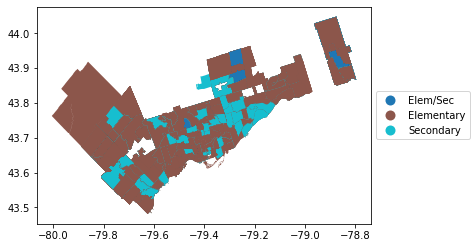

In [22]:
ax = newdff.plot(column='School Level', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"})

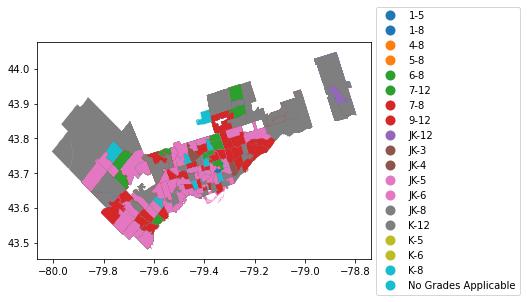

In [23]:
ax = newdff.plot(column='Grade Range', categorical=True, legend=True, \
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5),
                         'fmt': "{:.0f}"})

Im going to filter by school category (primary, elementary secondary, and map like that).
Find a way to toggle on streamplit so eople can play around with grade range category,
In this next bit lets get # of schools / population


In [24]:
newdff['City'].unique()

array(['Oshawa', 'OSHAWA', 'Ajax', 'AJAX', 'Pickering', 'PICKERING',
       'Markham', 'UNIONVILLE', 'MARKHAM', 'Mississauga', 'MISSISSAUGA',
       'Brampton', 'BRAMPTON', 'Toronto', 'TORONTO', 'SCARBOROUGH',
       'Agincourt', 'North York', 'East York', 'York', 'Etobicoke',
       'Rexdale'], dtype=object)

In [25]:
newdff = newdff.replace({'City' : { 'OSHAWA' : 'Oshawa', 'AJAX' : 'Ajax', 'PICKERING' : 'Pickering', 'UNIONVILLE': 'MARKHAM',
                                  'MISSISSAUGA': 'Mississauga', 'BRAMPTON':'Brampton', 'East York': 'Toronto',
                                  'Agincourt': 'Toronto', 'Etobicoke': 'Toronto', "Rexdale" : "Brampton",
                                  'North York': 'Toronto', 'SCARBOROUGH': 'Toronto', 'TORONTO': 'Toronto',
                                  'MARKHAM':'Markham', "York": 'Toronto','Missisauga':'Mississauga'}})


In [26]:
pop = pd.read_csv('population.csv')

In [27]:
pop.head(7)

,CITY,0 to 14 years,0 to 14 years M,0 to 14 years F,15 to 19 years,15 to 19 years M,15 to 19 years F
0,Ajax,"23,660","12,035","11,625","8,535","4,365","4,170"
1,Brampton,"120,245","62,305","57,940","42,820","22,450","20,370"
2,Markham,"55,390","28,570","26,815","21,095","10,910","10,185"
3,Mississsauga,"120,925","61,900","59,030","49,205","25,670","23,535"
4,Oshawa,"26,575","13,660","12,910","9,220","4,625","4,595"
5,Pickering,"14,915","7,575","7,335","6,290","3,300","2,990"
6,Toronto,"398,135","204,190","193,945","145,525","74,240","71,280"


In [28]:
pop.rename(columns={'CITY':'City'})

,City,0 to 14 years,0 to 14 years M,0 to 14 years F,15 to 19 years,15 to 19 years M,15 to 19 years F
0,Ajax,"23,660","12,035","11,625","8,535","4,365","4,170"
1,Brampton,"120,245","62,305","57,940","42,820","22,450","20,370"
2,Markham,"55,390","28,570","26,815","21,095","10,910","10,185"
3,Mississsauga,"120,925","61,900","59,030","49,205","25,670","23,535"
4,Oshawa,"26,575","13,660","12,910","9,220","4,625","4,595"
5,Pickering,"14,915","7,575","7,335","6,290","3,300","2,990"
6,Toronto,"398,135","204,190","193,945","145,525","74,240","71,280"


In [29]:
newdff["Population 0 to 14"] = 0
newdff["Population 14 to 19"] = 0

In [30]:
newdff["Population 0 to 14"][newdff['City'].str.contains("Ajax")] = 23660
newdff["Population 14 to 19"][newdff['City'].str.contains("Ajax")] = 8535

newdff["Population 0 to 14"][newdff['City'].str.contains("Brampton")] = 120245
newdff["Population 14 to 19"][newdff['City'].str.contains("Brampton")] = 42820

newdff["Population 0 to 14"][newdff['City'].str.contains("Markham")] = 55390
newdff["Population 14 to 19"][newdff['City'].str.contains("Markham")] = 21095

newdff["Population 0 to 14"][newdff['City'].str.contains("Mississauga")] = 120925
newdff["Population 14 to 19"][newdff['City'].str.contains("Mississauga")] = 49205

newdff["Population 0 to 14"][newdff['City'].str.contains("Oshawa")] = 26575
newdff["Population 14 to 19"][newdff['City'].str.contains("Oshawa")] = 9220

newdff["Population 0 to 14"][newdff['City'].str.contains("Pickering")] = 14915
newdff["Population 14 to 19"][newdff['City'].str.contains("Pickering")] = 6290

newdff["Population 0 to 14"][newdff['City'].str.contains("Toronto")] = 398135
newdff["Population 14 to 19"][newdff['City'].str.contains("Toronto")] = 145525

<ipython-input-30-687e28058900>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["Population 0 to 14"][newdff['City'].str.contains("Ajax")] = 23660
<ipython-input-30-687e28058900>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["Population 14 to 19"][newdff['City'].str.contains("Ajax")] = 8535
<ipython-input-30-687e28058900>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["Population 0 to 14"][newdff['City'].str.

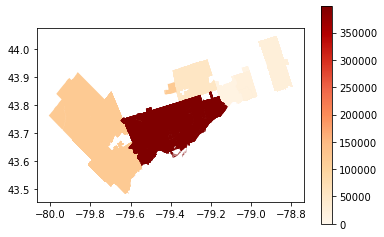

In [31]:
ax = newdff.plot(column='Population 0 to 14', categorical=False, cmap = 'OrRd', legend = True)

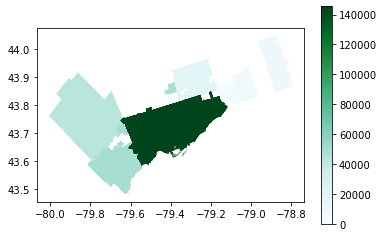

In [32]:
ax = newdff.plot(column='Population 14 to 19', categorical=False, cmap ='BuGn', legend= True)

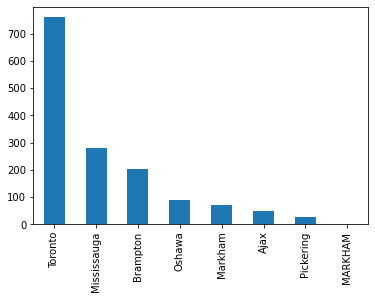

In [33]:
newdff.City.value_counts().plot(kind = 'bar')

In [34]:
import seaborn as sns

In [35]:
city_count  = newdff['City'].value_counts()

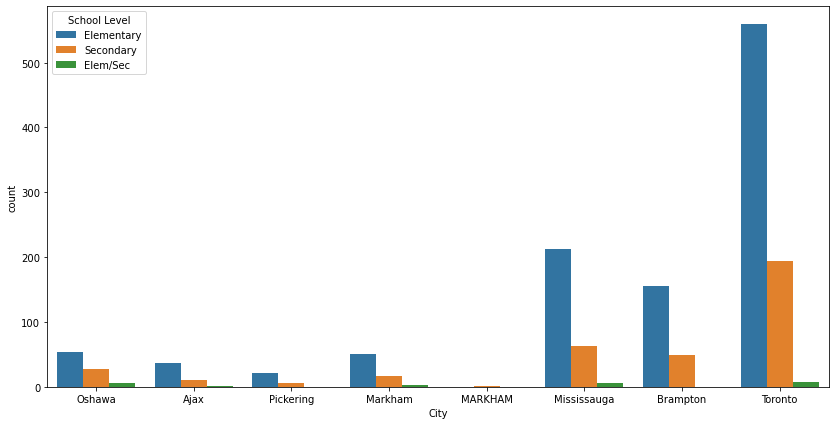

In [36]:

plt.figure(figsize=(14, 7))
sns.countplot('City', hue = "School Level", data = newdff)

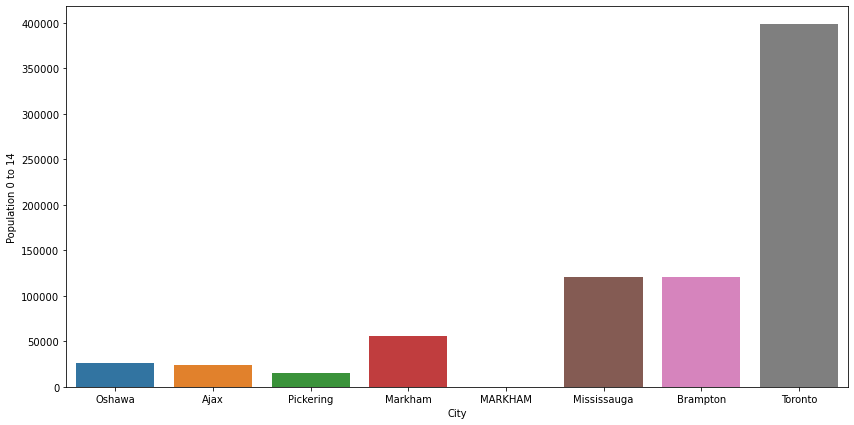

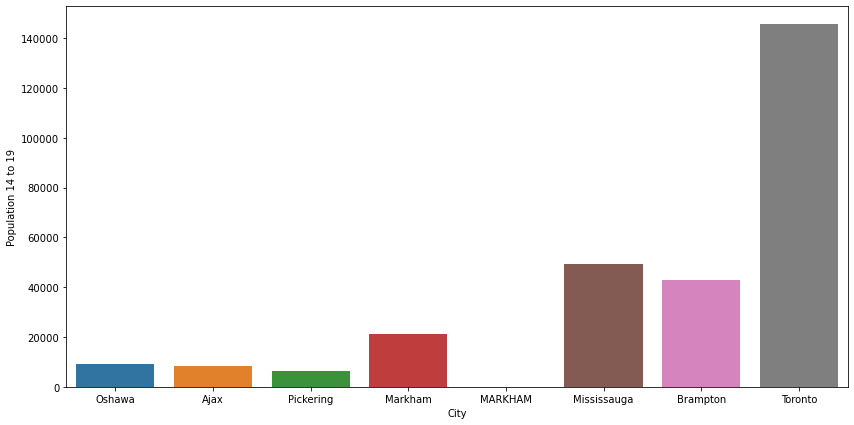

In [37]:
plt.figure(figsize=(14, 7))
sns.barplot('City', 'Population 0 to 14', data=newdff)
plt.figure(figsize=(14, 7))
sns.barplot('City', 'Population 14 to 19', data=newdff)

In [38]:
city_count = newdff['City'].value_counts()
city_count

Toronto        760
Mississauga    281
Brampton       204
Oshawa          88
Markham         70
Ajax            48
Pickering       28
MARKHAM          1
Name: City, dtype: int64

In [39]:
newdff["total schools"] = 0

In [40]:
newdff["total schools"][newdff['City'].str.contains("Ajax")] = 760

newdff["total schools"][newdff['City'].str.contains("Brampton")] = 281

newdff["total schools"][newdff['City'].str.contains("Markham")] = 204

newdff["total schools"][newdff['City'].str.contains("Mississauga")] = 88

newdff["total schools"][newdff['City'].str.contains("Oshawa")] = 71

newdff["total schools"][newdff['City'].str.contains("Pickering")] = 48

newdff["total schools"][newdff['City'].str.contains("Toronto")] = 28


<ipython-input-40-424a52e0931d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["total schools"][newdff['City'].str.contains("Ajax")] = 760
<ipython-input-40-424a52e0931d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["total schools"][newdff['City'].str.contains("Brampton")] = 281
<ipython-input-40-424a52e0931d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff["total schools"][newdff['City'].str.contains("Markh

In [41]:
newdff['total child population'] = newdff['Population 0 to 14'] + newdff['Population 14 to 19']

In [42]:
newdff['percapita ratio'] = newdff['total schools'] / newdff['total child population']

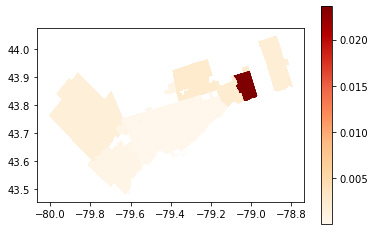

In [43]:
ax = newdff.plot(column='percapita ratio', categorical=False, cmap = 'OrRd', legend = True)

In [44]:
newdff["School Level"][newdff['City'].str.contains("Ajax")].value_counts()

Elementary    36
Secondary     11
Elem/Sec       1
Name: School Level, dtype: int64

In [45]:
newdff['Elementary counts'] = 0
newdff['Secondary counts'] = 0
newdff['Elem/Sec counts'] = 0

In [46]:
newdff['Elementary counts'][newdff['City'].str.contains("Ajax")] = 36
newdff['Secondary counts'][newdff['City'].str.contains("Ajax")] = 11
newdff['Elem/Sec counts'][newdff['City'].str.contains("Ajax")] =1

<ipython-input-46-135490d9b212>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Ajax")] = 36
<ipython-input-46-135490d9b212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Ajax")] = 11
<ipython-input-46-135490d9b212>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elem/Sec counts'][newdff['City'].str.contains("Aj

In [47]:
newdff["School Level"][newdff['City'].str.contains("Brampton")].value_counts()

Elementary    155
Secondary      49
Name: School Level, dtype: int64

In [48]:
newdff['Elementary counts'][newdff['City'].str.contains("Brampton")] = 155
newdff['Secondary counts'][newdff['City'].str.contains("Brampton")] = 49

<ipython-input-48-7b9a2f16756a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Brampton")] = 155
<ipython-input-48-7b9a2f16756a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Brampton")] = 49


In [49]:
newdff["School Level"][newdff['City'].str.contains("Markham")].value_counts()

Elementary    51
Secondary     16
Elem/Sec       3
Name: School Level, dtype: int64

In [50]:
newdff['Elementary counts'][newdff['City'].str.contains("Markham")] = 51
newdff['Secondary counts'][newdff['City'].str.contains("Markham")] = 17
newdff['Elem/Sec counts'][newdff['City'].str.contains("Markham")] =3

<ipython-input-50-2a15ef6d5d5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Markham")] = 51
<ipython-input-50-2a15ef6d5d5c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Markham")] = 17
<ipython-input-50-2a15ef6d5d5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elem/Sec counts'][newdff['City'].str.contai

In [51]:
newdff["School Level"][newdff['City'].str.contains("Mississauga")].value_counts()

Elementary    212
Secondary      63
Elem/Sec        6
Name: School Level, dtype: int64

In [52]:
newdff['Elementary counts'][newdff['City'].str.contains("Mississauga")] = 212
newdff['Secondary counts'][newdff['City'].str.contains("Mississauga")] = 63
newdff['Elem/Sec counts'][newdff['City'].str.contains("Mississauga")] =6

<ipython-input-52-66c4bf874923>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Mississauga")] = 212
<ipython-input-52-66c4bf874923>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Mississauga")] = 63
<ipython-input-52-66c4bf874923>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elem/Sec counts'][newdff['City'].s

In [53]:
newdff["School Level"][newdff['City'].str.contains("Oshawa")].value_counts()

Elementary    54
Secondary     28
Elem/Sec       6
Name: School Level, dtype: int64

In [54]:
newdff['Elementary counts'][newdff['City'].str.contains("Oshawa")] = 54
newdff['Secondary counts'][newdff['City'].str.contains("Oshawa")] = 28
newdff['Elem/Sec counts'][newdff['City'].str.contains("Oshawa")] =6

<ipython-input-54-d85f542dbfcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Oshawa")] = 54
<ipython-input-54-d85f542dbfcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Oshawa")] = 28
<ipython-input-54-d85f542dbfcb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elem/Sec counts'][newdff['City'].str.contains

In [55]:
newdff["School Level"][newdff['City'].str.contains("Pickering")].value_counts()

Elementary    22
Secondary      6
Name: School Level, dtype: int64

In [56]:
newdff['Elementary counts'][newdff['City'].str.contains("Pickering")] = 22
newdff['Secondary counts'][newdff['City'].str.contains("Pickering")] = 6


<ipython-input-56-0965cb496cab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Pickering")] = 22
<ipython-input-56-0965cb496cab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Pickering")] = 6


In [57]:
newdff["School Level"][newdff['City'].str.contains("Toronto")].value_counts()

Elementary    559
Secondary     194
Elem/Sec        7
Name: School Level, dtype: int64

In [58]:
newdff['Elementary counts'][newdff['City'].str.contains("Toronto")] = 559
newdff['Secondary counts'][newdff['City'].str.contains("Toronto")] = 194
newdff['Elem/Sec counts'][newdff['City'].str.contains("Toronto")] =7

<ipython-input-58-b011afba881d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elementary counts'][newdff['City'].str.contains("Toronto")] = 559
<ipython-input-58-b011afba881d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Secondary counts'][newdff['City'].str.contains("Toronto")] = 194
<ipython-input-58-b011afba881d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdff['Elem/Sec counts'][newdff['City'].str.cont

In [59]:
newdff['ratio of elementary schools to kids 0-14'] = (newdff['Elementary counts']+newdff['Elem/Sec counts']) / newdff['Population 0 to 14']

In [60]:
newdff['ratio of secondary schools to kids 15-19'] = (newdff['Secondary counts']+newdff['Elem/Sec counts']) / newdff['Population 14 to 19']

In [61]:
newdff['ratio of secondary schools to kids 15-19'] = newdff['ratio of secondary schools to kids 15-19'] *1000
newdff['ratio of elementary schools to kids 0-14'] = newdff['ratio of elementary schools to kids 0-14'] *1000

Text(0.5, 1.0, 'Elementary schools per 1000 kids ages 0-14')

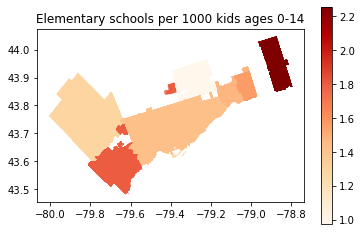

In [62]:
ax = newdff.plot(column='ratio of elementary schools to kids 0-14', categorical=False, cmap = 'OrRd', legend = True)
plt.title("Elementary schools per 1000 kids ages 0-14")

Text(0.5, 1.0, 'Secondary schools per 1000 kids ages 15-19')

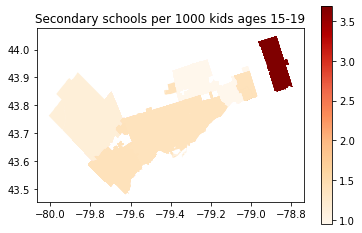

In [63]:
ax = newdff.plot(column='ratio of secondary schools to kids 15-19', categorical=False, cmap = 'OrRd', legend = True)
plt.title("Secondary schools per 1000 kids ages 15-19")

In [64]:
newdff.head()

,CFSAUID,PRUID,PRNAME,geometry,Board Type,Board Language,School Name,School Level,School Language,School Type,...,Population 0 to 14,Population 14 to 19,total schools,total child population,percapita ratio,Elementary counts,Secondary counts,Elem/Sec counts,ratio of elementary schools to kids 0-14,ratio of secondary schools to kids 15-19
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Cath Dist Sch Brd (E/F),English,Father Joseph Venini Catholic School,Elementary,English,Catholic,...,26575,9220,71,35795,0.001984,54,28,6,2.257761,3.687636
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Cath Dist Sch Brd (E/F),English,Sir Albert Love Catholic School,Elementary,English,Catholic,...,26575,9220,71,35795,0.001984,54,28,6,2.257761,3.687636
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Pub Dist Sch Brd (E/F),English,Beau Valley Public School,Elementary,English,Public,...,26575,9220,71,35795,0.001984,54,28,6,2.257761,3.687636
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Pub Dist Sch Brd (E/F),English,Coronation Public School,Elementary,English,Public,...,26575,9220,71,35795,0.001984,54,28,6,2.257761,3.687636
1194,L1G,35,Ontario,"POLYGON ((-78.82022 43.91187, -78.82019 43.911...",Pub Dist Sch Brd (E/F),English,Dr S J Phillips Public School,Elementary,English,Public,...,26575,9220,71,35795,0.001984,54,28,6,2.257761,3.687636


In [68]:
newdff['CFSAUID'].unique()

array(['L1G', 'L1H', 'L1J', 'L1K', 'L1L', 'L1S', 'L1T', 'L1V', 'L1W',
       'L1X', 'L1Z', 'L3P', 'L3R', 'L3S', 'L4B', 'L4T', 'L4W', 'L4X',
       'L4Y', 'L4Z', 'L5A', 'L5B', 'L5C', 'L5E', 'L5G', 'L5H', 'L5J',
       'L5K', 'L5L', 'L5M', 'L5N', 'L5R', 'L5V', 'L5W', 'L6B', 'L6C',
       'L6E', 'L6P', 'L6R', 'L6S', 'L6T', 'L6V', 'L6W', 'L6X', 'L6Y',
       'L6Z', 'L7A', 'L7C', 'M1B', 'M1C', 'M1E', 'M1G', 'M1H', 'M1J',
       'M1K', 'M1L', 'M1M', 'M1N', 'M1P', 'M1R', 'M1S', 'M1T', 'M1V',
       'M1W', 'M2H', 'M2J', 'M2K', 'M2L', 'M2M', 'M2N', 'M2P', 'M2R',
       'M3A', 'M3B', 'M3C', 'M3H', 'M3J', 'M3K', 'M3L', 'M3M', 'M3N',
       'M4A', 'M4B', 'M4C', 'M4E', 'M4G', 'M4H', 'M4J', 'M4K', 'M4L',
       'M4M', 'M4N', 'M4P', 'M4R', 'M4S', 'M4T', 'M4V', 'M4W', 'M4X',
       'M4Y', 'M5A', 'M5B', 'M5E', 'M5G', 'M5J', 'M5M', 'M5N', 'M5P',
       'M5R', 'M5S', 'M5T', 'M5V', 'M6A', 'M6B', 'M6C', 'M6E', 'M6G',
       'M6H', 'M6J', 'M6K', 'M6L', 'M6M', 'M6N', 'M6P', 'M6R', 'M6S',
       'M8V', 'M8W',

AttributeError: 'GeoDataFrame' object has no attribute 'save_csv'